importing libraries

In [2]:
import torch
import torchvision
from torchvision import datasets, io, models, ops, transforms, utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


print(f"PyTorch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

PyTorch version: 2.3.0+cu121
torchvision version: 0.18.0+cu121


In [3]:
# Import PyTorch
import torch

# We use torchvision to get our dataset and useful image transformations
import torchvision
import torchvision.transforms as transforms

# Import PyTorch's optimization libary and nn
# nn is used as the basic building block for our Network graphs
import torch.optim as optim
import torch.nn as nn

# Are we using our GPU?
print("GPU available: {}".format(torch.cuda.is_available()))


GPU available: True


loading the dataset

In [3]:
from google.colab import files

# Upload the .zip file
uploaded = files.upload()

# Extract the contents of the .zip file
import zipfile
import io

with zipfile.ZipFile("/content/pump_sensor_data.zip", 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')
    zip_ref.close()

Saving pump_sensor_data.zip to pump_sensor_data.zip


In [4]:
import tensorflow as tf
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
# Clear session to free up memory
tf.keras.backend.clear_session()

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

In [5]:
data_dir = '/content/dataset'
ex_file=os.listdir(data_dir)

In [6]:
import pandas as pd

# Load the dataset
file_path = os.path.join(data_dir, ex_file[0])  # Assuming there's only one file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [8]:
#check nan values
data.isnull().sum()

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


In [9]:
# Calculate the percentage of NaN values in each column
nan_percentage = data.isnull().mean() * 100

# Define a threshold for NaN percentage (adjust as needed)
threshold = 50

# Get columns with NaN percentage greater than the threshold
columns_to_drop = nan_percentage[nan_percentage > threshold].index

# Drop columns with high NaN percentage
data.drop(columns=columns_to_drop, inplace=True)


machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


<ipython-input-10-d37dfb1604f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='machine_status',data=data,palette='Blues_d');


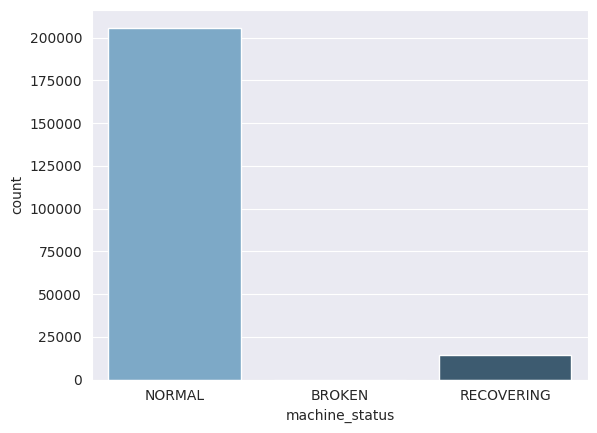

In [10]:
print(data.machine_status.value_counts())
sns.countplot(x='machine_status',data=data,palette='Blues_d');

preprocessing the data

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Drop non-numeric columns (e.g., date columns)
data_numeric = data.select_dtypes(include=[float, int])

# Handle missing values (if any)
data_numeric.fillna(method='ffill', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_numeric)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data_numeric.columns)

# Display the first few rows of the scaled data
scaled_data.head()


,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,0.000000,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,...,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853,0.221660,0.178571
1,0.000005,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,...,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853,0.221660,0.178571
2,0.000009,0.959089,0.834736,0.876660,0.890052,0.797904,0.735461,0.598568,0.679645,0.640988,...,0.027367,0.044746,0.013959,0.132874,0.072330,0.039791,0.242162,0.092531,0.219875,0.180952
3,0.000014,0.965264,0.830145,0.874763,0.890052,0.784402,0.769891,0.598243,0.688535,0.644259,...,0.026627,0.042712,0.013662,0.130905,0.072330,0.039791,0.242162,0.091870,0.218982,0.180357
4,0.000018,0.959475,0.830910,0.876660,0.890052,0.794855,0.765891,0.599870,0.687002,0.644259,...,0.026627,0.044068,0.013365,0.131890,0.074012,0.041885,0.246487,0.091210,0.220768,0.178571


In [12]:
import numpy as np

# Define a function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length].values[0]  # Assuming the first column is the target
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Set the sequence length
sequence_length = 50  # You can adjust this

# Create sequences and labels
x, y = create_sequences(scaled_data, sequence_length)

# Define split ratios
split_ratio = 0.7  # Training set ratio
val_ratio = 0.15  # Validation set ratio
test_ratio = 0.15  # Test set ratio

# Calculate sizes based on ratios
total_size = len(x)
train_size = int(total_size * split_ratio)
val_size = int(total_size * val_ratio)
test_size = int(total_size * test_ratio)

# Split the data into training, validation, and test sets
x_train = x[:train_size]
y_train = y[:train_size]
x_val = x[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]
x_test = x[train_size+val_size:train_size+val_size+test_size]
y_test = y[train_size+val_size:train_size+val_size+test_size]

# Display the shapes of the training, validation, and test sets
print(f"Shape of X_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_val: {x_val.shape}, y_val: {y_val.shape}")
print(f"Shape of X_test: {x_test.shape}, y_test: {y_test.shape}")


Shape of X_train: (154189, 50, 52), y_train: (154189,)
Shape of X_val: (33040, 50, 52), y_val: (33040,)
Shape of X_test: (33040, 50, 52), y_test: (33040,)


In [13]:
# Function to check for NaNs in data
def check_for_nans(data):
    nan_count = np.isnan(data).sum().sum()
    if nan_count > 0:
        print(f'NaNs detected: {nan_count}')
    else:
        print('No NaNs detected')

print("Checking for NaNs in scaled data before sequence creation...")
check_for_nans(scaled_data)

Checking for NaNs in scaled data before sequence creation...
No NaNs detected


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_val, y_val), callbacks=[early_stopping])

# Evaluate the model on test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')


In [1]:
# Clear session to free up memory
tf.keras.backend.clear_session()

NameError: name 'tf' is not defined

In [ ]:
# Function to make predictions in batches
def batch_predict(model, data, batch_size=32):
    predictions = []
    for start in range(0, len(data), batch_size):
        end = min(start + batch_size, len(data))
        batch_predictions = model.predict(data[start:end])
        predictions.append(batch_predictions)
    return np.concatenate(predictions, axis=0)

In [ ]:
y_pred = batch_predict(model, x_test)

In [ ]:

# Predict on test set
y_pred = model.predict(x_test)

# Calculate additional metrics (MSE, RMSE)
mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)

print(f'MAE: {test_mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

1033/1033 [==============================] - 5s 4ms/step


In [ ]:
# Predict on test set
y_pred = model.predict(x_test)

# Calculate metrics (MAE, MSE, RMSE)
mae = np.mean(np.abs(y_pred - y_test))
mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

In [ ]:
# Plot training history
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()